In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [15]:
df = pd.read_csv("../data/data.csv")

In [16]:
published = df[df['soltype'] == "Published Confirmed"].sort_values(by='pl_name').drop_duplicates(subset='pl_name', keep='first')

Text(0.5, 1.0, 'Number of Discovered Exo-planets by Year')

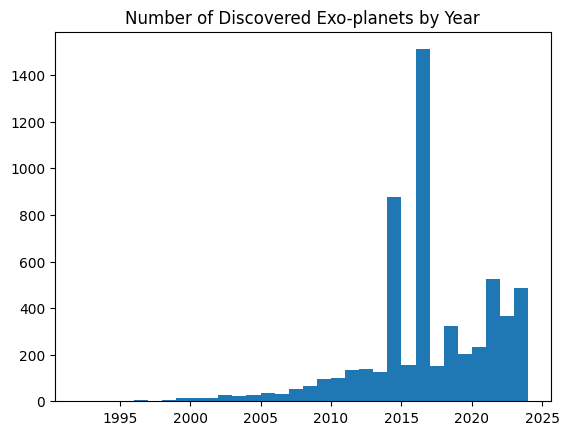

In [32]:
_ = plt.hist(published['disc_year'], bins=32)
plt.title("Number of Discovered Exo-planets by Year")

In [5]:
disc_facility = published[['disc_facility', 'disc_year']]

Text(0.5, 1.0, 'Discovered Exo-planets by Major Facilities (>=60)')

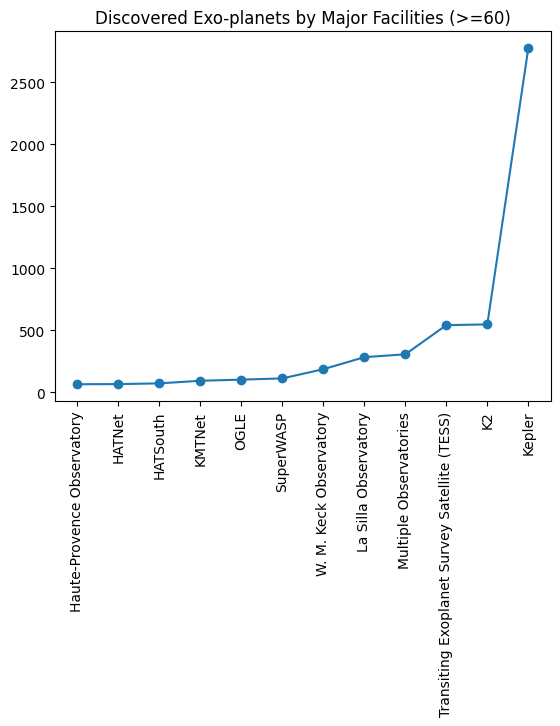

In [35]:
by_disc_facility = disc_facility.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])
by_disc_facility = by_disc_facility[by_disc_facility['cnt'] > 60]
plt.plot(by_disc_facility['disc_facility'], by_disc_facility['cnt'])
plt.scatter(by_disc_facility['disc_facility'], by_disc_facility['cnt'])
_ = plt.xticks(rotation=90)  # Set the angle of x-axis ticks to 45 degrees
plt.title("Discovered Exo-planets by Major Facilities (>=60)")

Text(0.5, 1.0, 'Breakdown of Exo-planet by Years for Each Major Facility (>=60)')

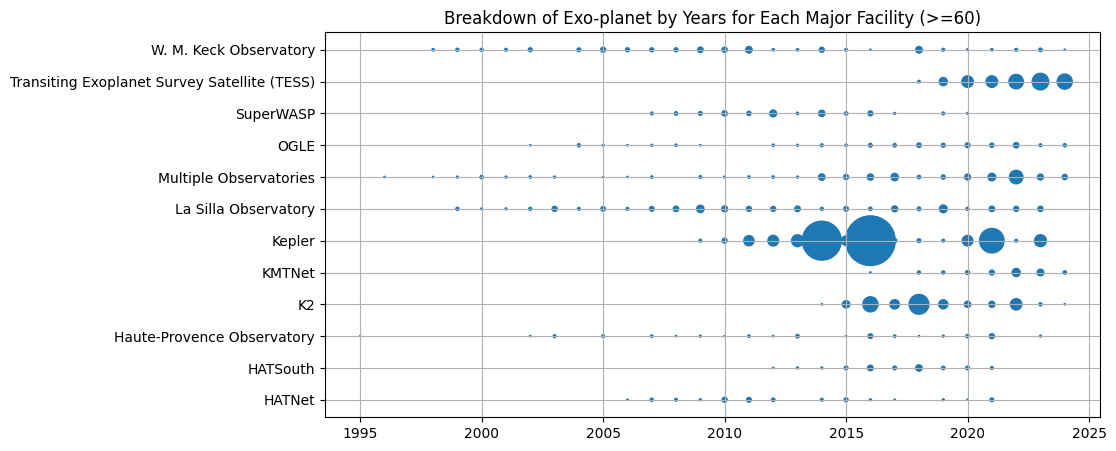

In [36]:
disc_facility_grouped = disc_facility.groupby(['disc_facility', 'disc_year']).size().reset_index(name='cnt')
big_disc_facility_year_grouped = disc_facility_grouped[(disc_facility_grouped['disc_facility'].isin(by_disc_facility['disc_facility']))]
plt.figure(figsize=(10, 5))  # 10 inches wide, 6 inches high

plt.scatter(big_disc_facility_year_grouped['disc_year'], big_disc_facility_year_grouped['disc_facility'], s=big_disc_facility_year_grouped['cnt'] )
plt.grid()
plt.title("Breakdown of Exo-planet by Years for Each Major Facility (>=60)")

In [29]:
published.groupby(['discoverymethod']).size().reset_index(name='cnt').sort_values(['cnt'])

,discoverymethod,cnt
1,Disk Kinematics,1
7,Pulsation Timing Variations,2
0,Astrometry,3
6,Pulsar Timing,8
5,Orbital Brightness Modulation,9
2,Eclipse Timing Variations,17
10,Transit Timing Variations,29
3,Imaging,82
4,Microlensing,223
8,Radial Velocity,1092


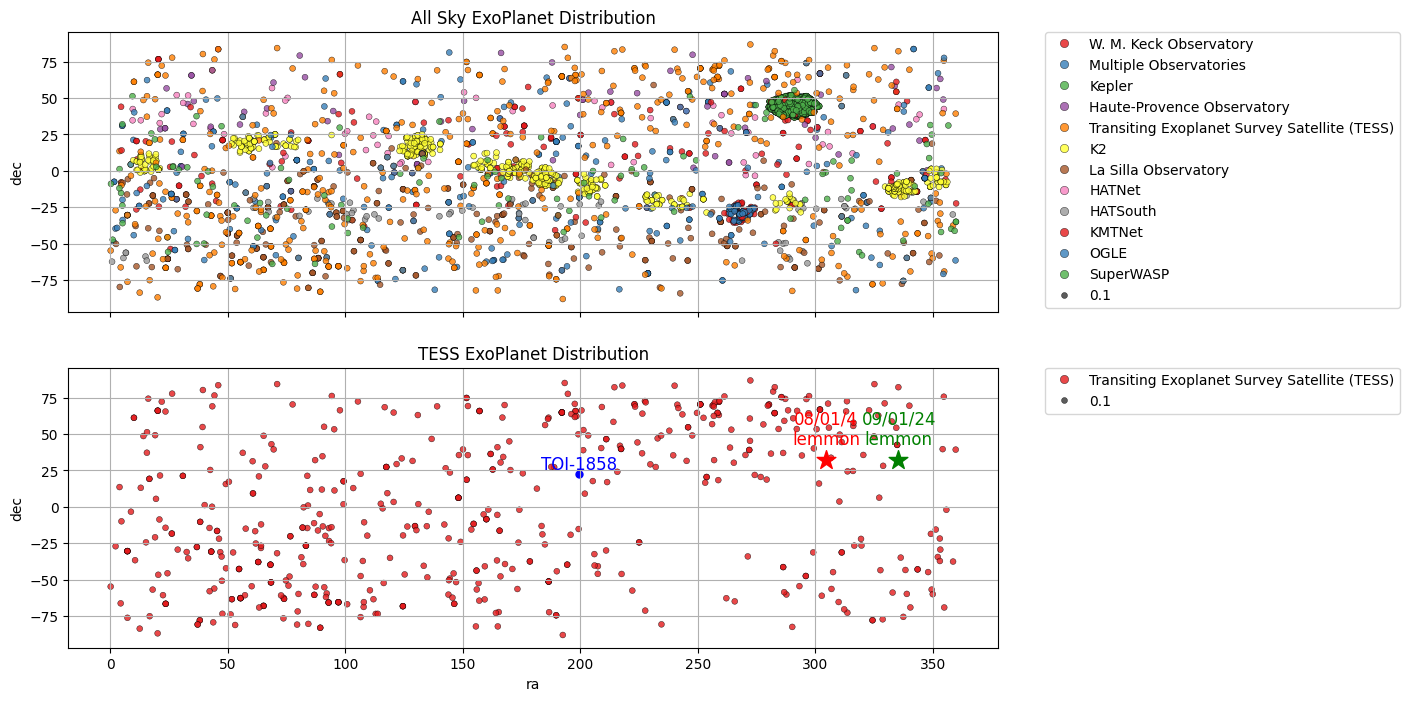

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)  # 2x2 grid of subplots
top_published = published[(published['disc_facility'].isin(by_disc_facility['disc_facility']))]
tess = published[(published['disc_facility']== 'Transiting Exoplanet Survey Satellite (TESS)')]

sns.scatterplot(ax=axes[0], data=top_published, x='ra', y='dec', hue='disc_facility', palette='Set1', edgecolor='k', size=0.1, alpha=.8, legend=True)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[0].set_title("All Sky ExoPlanet Distribution")
axes[0].grid()
sns.scatterplot(ax=axes[1], data=tess, x='ra', y='dec', hue='disc_facility', palette='Set1', edgecolor='k', size=0.1, alpha=.8, legend=True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[1].set_title("TESS ExoPlanet Distribution")

axes[1].text(304.6, 40, '08/01/4\nlemmon', fontsize=12, ha='center', va='bottom', color='red')
axes[1].scatter(304.6, 32.44, color='red', marker='*', s=200)  # s is the size of the marker
axes[1].text(335.6, 40, '09/01/24\nlemmon', fontsize=12, ha='center', va='bottom', color='green')
axes[1].scatter(335.1, 32.44, color='green', marker='*', s=200)  # s is the size of the marker
axes[1].text(199.4127125, 22.8500086, 'TOI-1858', fontsize=12, ha='center', va='bottom', color='blue')
axes[1].scatter(199.4127125, 22.8500086, color='blue', marker='.', s=100)  # s is the size of the marker
axes[1].grid()